In [20]:
import pandas as pd 
df=pd.read_csv('c:/data/ram/ram_price.csv')
df.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


Text(0, 0.5, 'price')

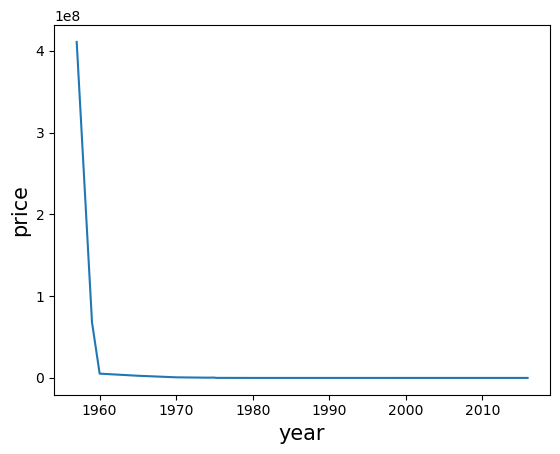

In [21]:
import matplotlib.pyplot as plt 
plt.plot(df['date'],df['price'])
plt.xlabel('year',size=15)
plt.ylabel('price', size=15)

Text(0, 0.5, 'price')

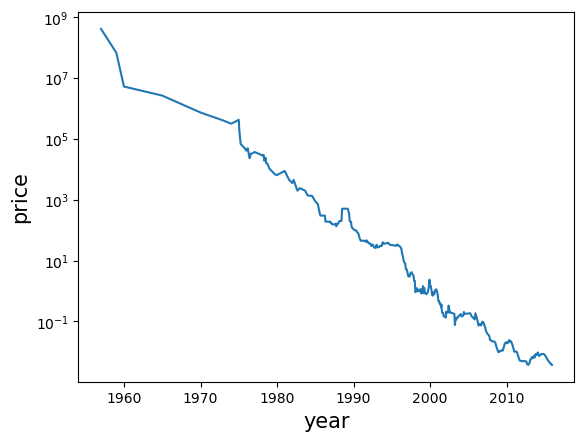

In [22]:
import matplotlib.pyplot as plt 
plt.semilogy(df['date'],df['price']) #로그 단위로 변환
plt.xlabel('year',size=15)
plt.ylabel('price', size=15)

In [23]:
import numpy as np 
X_train0=df[df['date']<2000]
X_test=df[df['date']>=2000]
X_train=X_train0['date'][:, None]
y_train=np.log(X_train0['price'])
y_test=np.log(X_test['price'])

C:\Users\user\AppData\Local\Temp\ipykernel_9040\2192132993.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train=X_train0['date'][:, None]


In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR 
tree = DecisionTreeRegressor().fit(X_train, y_train)
lr = LinearRegression().fit(X_train, y_train) #선형회귀모형
svr = SVR(kernel='linear').fit(X_train, y_train) #선형회귀모형
# kernel = '
#전체 기간의 자료
x_all = np.array(df['date']).reshape(-1, 1)
pred_tree = tree.predict(x_all)
price_tree = np.exp(pred_tree) # log값 되돌리기
pred_lr = lr.predict(x_all)
price_lr = np.exp(pred_lr) # log값 되돌리기

pred_svr = svr.predict(x_all)
price_svr = np.exp(pred_svr) # log값 되돌리기



In [28]:
X_test['price']

202    1.5600
203    1.4800
204    1.0800
205    0.8400
206    0.7000
        ...  
328    0.0045
329    0.0043
330    0.0042
331    0.0038
332    0.0037
Name: price, Length: 131, dtype: float64

In [33]:
[X_test['price'].values]

[array([1.56  , 1.48  , 1.08  , 0.84  , 0.7   , 0.9   , 0.77  , 0.84  ,
        1.07  , 1.12  , 1.12  , 0.9   , 0.75  , 0.464 , 0.464 , 0.383 ,
        0.387 , 0.305 , 0.352 , 0.27  , 0.191 , 0.191 , 0.169 , 0.148 ,
        0.134 , 0.207 , 0.193 , 0.193 , 0.33  , 0.193 , 0.193 , 0.176 ,
        0.076 , 0.126 , 0.115 , 0.133 , 0.129 , 0.143 , 0.148 , 0.16  ,
        0.166 , 0.174 , 0.148 , 0.146 , 0.156 , 0.203 , 0.176 , 0.185 ,
        0.149 , 0.116 , 0.185 , 0.112 , 0.073 , 0.082 , 0.073 , 0.088 ,
        0.098 , 0.092 , 0.082 , 0.078 , 0.066 , 0.0464, 0.0386, 0.0351,
        0.0322, 0.0244, 0.0244, 0.0232, 0.022 , 0.022 , 0.0207, 0.0176,
        0.0146, 0.011 , 0.0098, 0.0098, 0.0107, 0.0105, 0.0115, 0.011 ,
        0.0127, 0.0183, 0.0205, 0.019 , 0.0202, 0.0195, 0.0242, 0.021 ,
        0.022 , 0.0171, 0.0146, 0.0122, 0.01  , 0.0103, 0.01  , 0.0085,
        0.0054, 0.0051, 0.0049, 0.0049, 0.005 , 0.0049, 0.0048, 0.004 ,
        0.0037, 0.0043, 0.0054, 0.0067, 0.0061, 0.0073, 0.0065, 

In [36]:
from sklearn.metrics import mean_squared_error
y_pred = tree.predict(X_test['price'].values.reshape(-1,1))
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

y_pred = lr.predict(X_test['price'].values.reshape(-1,1))
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

y_pred = svr.predict(X_test['price'].values.reshape(-1,1))
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

23.038370257895192


ValueError: Expected 2D array, got 1D array instead:
array=[1.56   1.48   1.08   0.84   0.7    0.9    0.77   0.84   1.07   1.12
 1.12   0.9    0.75   0.464  0.464  0.383  0.387  0.305  0.352  0.27
 0.191  0.191  0.169  0.148  0.134  0.207  0.193  0.193  0.33   0.193
 0.193  0.176  0.076  0.126  0.115  0.133  0.129  0.143  0.148  0.16
 0.166  0.174  0.148  0.146  0.156  0.203  0.176  0.185  0.149  0.116
 0.185  0.112  0.073  0.082  0.073  0.088  0.098  0.092  0.082  0.078
 0.066  0.0464 0.0386 0.0351 0.0322 0.0244 0.0244 0.0232 0.022  0.022
 0.0207 0.0176 0.0146 0.011  0.0098 0.0098 0.0107 0.0105 0.0115 0.011
 0.0127 0.0183 0.0205 0.019  0.0202 0.0195 0.0242 0.021  0.022  0.0171
 0.0146 0.0122 0.01   0.0103 0.01   0.0085 0.0054 0.0051 0.0049 0.0049
 0.005  0.0049 0.0048 0.004  0.0037 0.0043 0.0054 0.0067 0.0061 0.0073
 0.0065 0.0082 0.0085 0.0079 0.0095 0.0079 0.0073 0.0079 0.0085 0.0085
 0.0085 0.0078 0.0073 0.0061 0.0056 0.0049 0.0045 0.0043 0.0042 0.0038
 0.0037].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Text(0, 0.5, 'price')

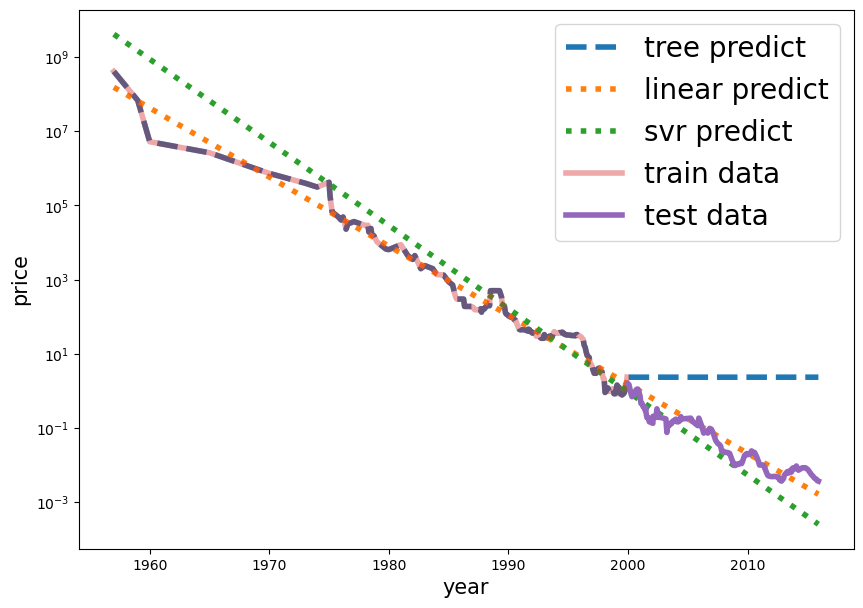

In [ ]:
plt.figure(figsize=(10,7))
plt.semilogy(df['date'],price_tree,label='tree predict',lw='4',ls='--')
plt.semilogy(df['date'],price_lr,label='linear predict',lw='4',ls=':')
plt.semilogy(df['date'],price_svr,label='svr predict',lw='4',ls=':')
plt.semilogy(X_train0['date'],X_train0['price'], label='train data', lw='4', alpha=0.4)
plt.semilogy(X_test['date'],X_test['price'],lw='4',label='test data')
plt.legend(loc=1, fontsize=20)
plt.xlabel('year',size=15)
plt.ylabel('price',size=15)